In [5]:
import matplotlib.pyplot as plt

from Predictions import *
import pandas as pd
import numpy as np

from sklearn.metrics import root_mean_squared_error

epsilon = 0.01
test_size_constant = 50
val_size_constant = 0
template_length_constant = 4
template_spread_constant = 4
ts_size = 100000
dt = 0.01
divisor = int(0.1 / dt)
window_index = 5000

r_values = [28]
list_ts = []
rmses = []
for i, r in enumerate(r_values):
    ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
    list_ts.append(ts)
while window_index < int(ts_size / divisor) - test_size_constant:
    tsproc = TSProcessor(list_ts, template_length=template_length_constant,
                         max_template_spread=template_spread_constant,
                         window_index=window_index, test_size=test_size_constant)

    fort, values = tsproc.pull(epsilon)
    real_values = list_ts[0].values[window_index:window_index + test_size_constant]
    pred_values1 = values[-test_size_constant:]
    window_index += test_size_constant
    rmses += root_mean_squared_error(real_values, pred_values1)
    print(np.mean(rmses))



0.013174932392070801
0.02951805337492269
0.03143960035748791
0.010897543273756803
0.025210456605535836
0.026565697802001898
0.015575227095360559
0.03331369664458116
0.004734689264831199
0.01599154302126856
0.00639663908084253
0.022138391111537644
0.03554993096894837
0.023706007342791418
0.006179357043373479
0.04606140928252701
0.006134025051066418
0.017748902899494132
0.09539907622141514
0.021857701185840062
0.019464153274720175
0.023877297628192785
0.007143524793272676
0.015356496939427517


KeyboardInterrupt: 

100%|███████████████████████████████████████████| 49/49 [33:42<00:00, 41.27s/it]


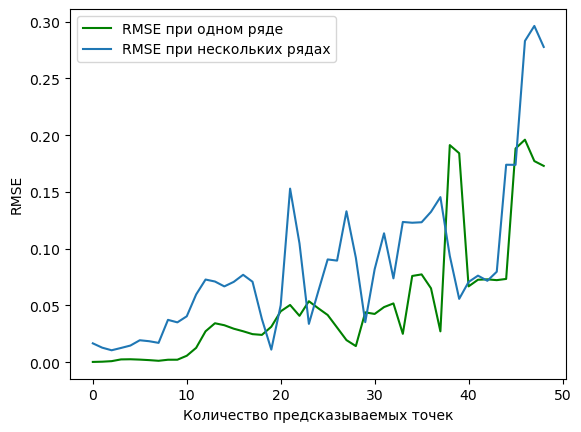

In [1]:
from Predictions import *
import numpy as np

from sklearn.metrics import root_mean_squared_error

epsilon = 0.01
test_size_constant = 50
val_size_constant = 200
template_length_constant = 5
template_spread_constant = 5
ts_size = 100000
dt = 0.01
divisor = int(0.1 / dt)
window_size = 50

rmses = []
r_values = [28]
list_ts = []
for i, r in enumerate(r_values):
    ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
    list_ts.append(ts)

for test_size_constant in tqdm(range(1, 50)):
    tsproc = TSProcessor(list_ts, template_length=template_length_constant,
                         max_template_spread=template_spread_constant,
                         window_index=10000 - 51, test_size=test_size_constant)
    fort, values = tsproc.pull(epsilon)
    real_values = list_ts[0].values[-test_size_constant:]
    pred_values1 = values[-test_size_constant:]
    rmses.append(root_mean_squared_error(real_values, pred_values1))
plt.plot(rmses, label='RMSE при одном ряде', color='green')

# r_values = [28, 24.74, 30, 40, 35]
# list_ts = []
#
# for i, r in enumerate(r_values):
#     ts = TimeSeries("Lorentz", size=ts_size, r=r, dt=dt, divisor=divisor)
#     list_ts.append(ts)
#
# rmses2 = []
# for test_size_constant in tqdm(range(1,50)):
#     tsproc = TSProcessor(list_ts, template_length=template_length_constant, max_template_spread=template_spread_constant,
#                      train_size=len(list_ts[0].values) - val_size_constant - test_size_constant,
#                      val_size=val_size_constant, test_size=test_size_constant)
#     fort, values = tsproc.pull(epsilon)
#     real_values = list_ts[0].values[-test_size_constant:]
#     pred_values1 = values[-test_size_constant:]
#     rmses2.append(root_mean_squared_error(real_values, pred_values1))
# plt.plot(rmses2, label='RMSE при нескольких рядах')
plt.xlabel('Количество предсказываемых точек')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [2]:
print(round(np.mean(rmses), 2))
print(round(np.mean(rmses2), 2))

0.05
0.09
